In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from keras_tqdm import TQDMNotebookCallback

/home/csci4850/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# need to get data setup and organized (it is mostly)
data = []
one_hot_index = 0
reviewers = {}
y_training = []

# need to find out exactly how many unique reviewerIDs there are;
# that will replace 100 in np.zeros, since that will be the output of the final softmax layer

authors = 8

with open('demo_input.dat') as file:
    for line in file:
        split = line.split('\t')
        vectorVals = split[0][1:-1].split(',')
        reviewerID = split[1].strip()
        if reviewerID not in reviewers:
            reviewers[reviewerID] = np.zeros(authors)
            reviewers[reviewerID][one_hot_index] = 1
            one_hot_index += 1
            y_training.append(reviewers[reviewerID])
        else:
            y_training.append(reviewers[reviewerID])
        data.append([float(x) for x in vectorVals])
        # need to go thru file to find out how many unique authors, capped at 3 for testing a small sample set
        if one_hot_index == authors:
            break
print(len(data))
print(len(data[0]))

# =====================================================
# =====================================================
x_training = np.array(data)
# convert the 2d to 3d representation
x_training = x_training.reshape(x_training.shape + (1,))
output_shape = x_training.shape[1]
input_shape = x_training.shape[2]
y_training = np.array(y_training)
print('X_training shape: ' + str(x_training.shape))
# =====================================================
# =====================================================

print('='*16)
print(len(y_training))
print(len(y_training[0]))

8
300
X_training shape: (8, 300, 1)
8
8


In [3]:
model = keras.Sequential()

model.add(keras.layers.Conv1D(300, kernel_size=(3), strides=(1),
                 activation='tanh',
                 input_shape=[output_shape,
                              input_shape]))
model.add(keras.layers.Flatten())


model.add(keras.layers.Dropout(.20, noise_shape=None, seed=None))
model.add(keras.layers.Dense(600, activation='tanh'))

model.add(keras.layers.Dense(y_training.shape[1], activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 298, 300)          1200      
_________________________________________________________________
flatten_1 (Flatten)          (None, 89400)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 89400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 600)               53640600  
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 4808      
Total params: 53,646,608
Trainable params: 53,646,608
Non-trainable params: 0
_________________________________________________________________


In [4]:
y_training = np.array(y_training)

batch_size = 4
epochs = 50
history = model.fit(x_training, y_training,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    callbacks=[TQDMNotebookCallback()])


HBox(children=(IntProgress(value=0, description='Training', max=50), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=8), HTML(value='')))

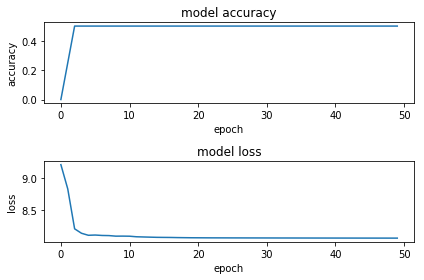

In [7]:
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.tight_layout()
plt.show()

In [8]:
score = model.evaluate(x_training, y_training, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 [==============================] - 0s 23ms/step
Test loss: 8.06515121459961
Test accuracy: 0.5
